In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/GKB_usedTBs.csv', header=None, sep='\n')
df = df[0].str.split('\t', expand=True)
df.columns = ['name1', 'length1', 'name2', 'length2', 'countHits', 'lengthHits', 'proximity']
del df['length1']
del df['length2']
del df['lengthHits']
del df['countHits']

df.describe()

,name1,name2,proximity
count,72505,72505,72505
unique,718,724,1824
top,Schuldanerkennung,Schuldanerkennung,0.97%
freq,836,1015,1526


In [4]:
u1 = df['name1'].unique()
u2 = df['name2'].unique()

missing1 = [a for a in u1 if a not in u2]
missing2 = [a for a in u2 if a not in u1]
missing = len(missing1) + len(missing2)
print(missing)

232


In [5]:
allNames = []
for name in u1:
  if name in u2:
    allNames.append(name)

for name in u2:
  if name in u1:
    allNames.append(name)

allNames = list(set(allNames))
allNames.sort()

len(allNames)

605

In [0]:
matrix = np.ones((len(allNames), len(allNames)))

for i, row in df.iterrows():
  n1, n2, value = row
  if n1 in allNames and n2 in allNames:
    i1 = allNames.index(n1)
    i2 = allNames.index(n2)

    value = value.replace('%', '')
    value = 1 - float(value) / 100
    # print('%s %s - %s - %s %s' % (n1, i1, value, n2, i2))
    
    if n1 in missing2 or n2 in missing1:
      pass
    elif i1 == i2:
      matrix[i1, i2] = 0
    else:
      matrix[i1, i2] = value

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=2000)
tsne_results = tsne.fit_transform(matrix)

[t-SNE] Computing 604 nearest neighbors...
[t-SNE] Indexed 605 samples in 0.001s...
[t-SNE] Computed neighbors for 605 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 605 / 605
[t-SNE] Mean sigma: 1.334962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.791351
[t-SNE] KL divergence after 2000 iterations: 0.013833


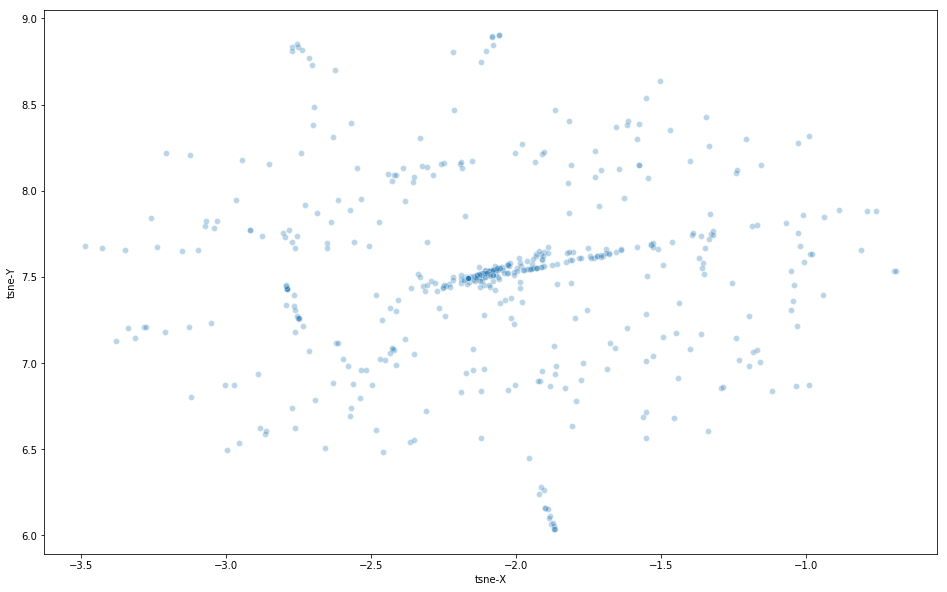

In [11]:
matrix = pandas.DataFrame(matrix)

matrix['tsne-X'] = tsne_results[:,0]
matrix['tsne-Y'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-X", y="tsne-Y",
    palette=sns.color_palette("hls", 10),
    data=matrix,
    legend="full",
    alpha=0.3
)